In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Project: Image Captioning
#####Author: Ankit Kumar Prem

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  



In this notebook, I will explore this dataset, in preparation for the project.

## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you will use to obtain the data.

In [3]:
import os
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = '/opt/cocoapi'
dataType = 'val2014'
instances_annFile = "/content/drive/MyDrive/Colab Notebooks/coco_dataset/instances_val2014.json"
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = "/content/drive/MyDrive/Colab Notebooks/coco_dataset/captions_val2014.json"
coco_caps = COCO(captions_annFile)

# get image ids
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=10.52s)
creating index...
index created!
loading annotations into memory...
Done (t=1.08s)
creating index...
index created!


## Step 2: Plot a Sample Image

Next, I plotted a random image from the dataset, along with its five corresponding captions (just exploring the dataset). Each time I run the code cell below, a different image is selected.  

In the project, I have used this dataset to train my model to generate captions from images!

http://images.cocodataset.org/val2014/COCO_val2014_000000139099.jpg


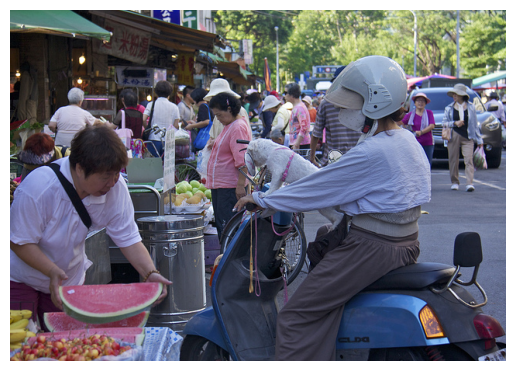

A street scene with a person on a motorcycle.
a person on a motorcycle along a farmers market
A woman is showing a watermelon slice to a woman on a scooter.
A person on a motorcycle talking to a person with a watermelon.
People at a veggie and fruit market looking at the merchandise.


In [12]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)